# Web Traffic Forecasting - Part 1: Exploratory Data Analysis #

In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Please change the path of this data file into the correct path of your own google drive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Course/F22/'94867 DABP'/'94867 DABP Project'/

Mounted at /content/drive/
/content/drive/My Drive/Course/F22/94867 DABP/94867 DABP Project


In [3]:
df = pd.read_csv('data/train_2.csv')

In [4]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,2.0,4.0
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,25.0,22.0,47.0,42.0,13.0,9.0,21.0,16.0,6.0
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,6.0,5.0,1.0,5.0,8.0,2.0,4.0,3.0,3.0


## Data Cleaning & EDA

In [ ]:
# check null
df.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2017-09-06     1775
2017-09-07     3467
2017-09-08     1061
2017-09-09     3332
2017-09-10     5578
Length: 804, dtype: int64

In [ ]:
# proportion of the number of NA values
(df.isna().sum().sum()) / (df.shape[0]*df.shape[1])

0.06025301136102712

Text(0, 0.5, 'page count')

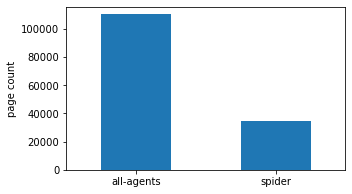

In [ ]:
# extract agent
df2 = df.copy()
df2['agent'] = df['Page'].apply(lambda s:s.split("_")[-1])
df2['agent'].value_counts().plot.bar(figsize=(5, 3), rot=0)
plt.ylabel("page count")

Text(0, 0.5, 'page count')

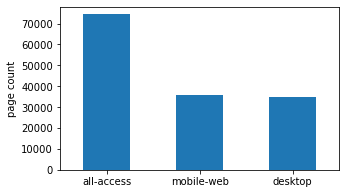

In [ ]:
# extract access
df2['access'] = df['Page'].apply(lambda s:s.split("_")[-2])
df2['access'].value_counts().plot.bar(figsize=(5, 3),rot=0)
plt.ylabel("page count")

Text(0.5, 1.0, 'Page count across languages')

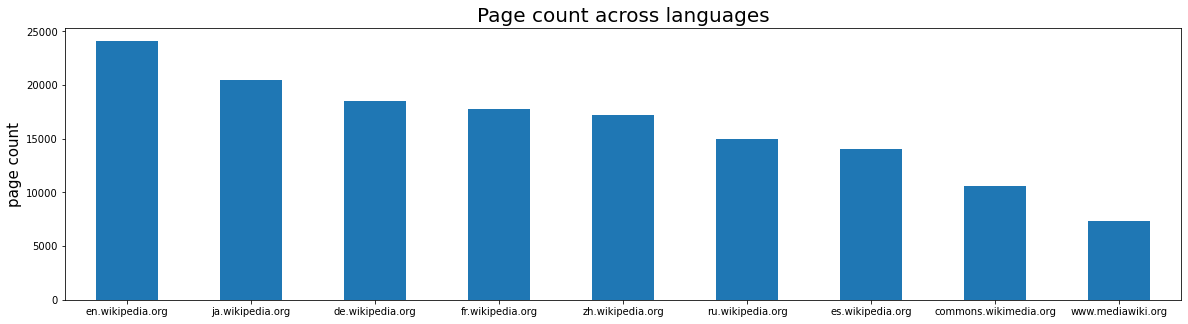

In [ ]:
# check sources
df['Page'].apply(lambda s:s.split("_")[-3]).value_counts().plot.bar(figsize=(20, 5), rot=0)
plt.ylabel("page count", fontsize=15)
plt.title("Page count across languages", fontsize=20)

In [ ]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

df2['language'] = df.Page.map(get_language)

In [ ]:
df2

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,agent,access,language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,18.0,16.0,27.0,29.0,23.0,54.0,38.0,spider,all-access,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,19.0,54.0,25.0,26.0,23.0,13.0,81.0,spider,all-access,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,2.0,4.0,7.0,3.0,4.0,7.0,6.0,spider,all-access,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,9.0,6.0,16.0,19.0,30.0,38.0,4.0,spider,all-access,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,20.0,23.0,28.0,14.0,8.0,7.0,spider,all-access,zh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,5.0,2.0,4.0,4.0,8.0,2.0,spider,all-access,es
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,0.0,5.0,5.0,2.0,2.0,4.0,spider,all-access,es
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.0,42.0,13.0,9.0,21.0,16.0,6.0,spider,all-access,es
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,5.0,8.0,2.0,4.0,3.0,3.0,spider,all-access,es


Text(0.5, 1.0, 'Average visit across languages')

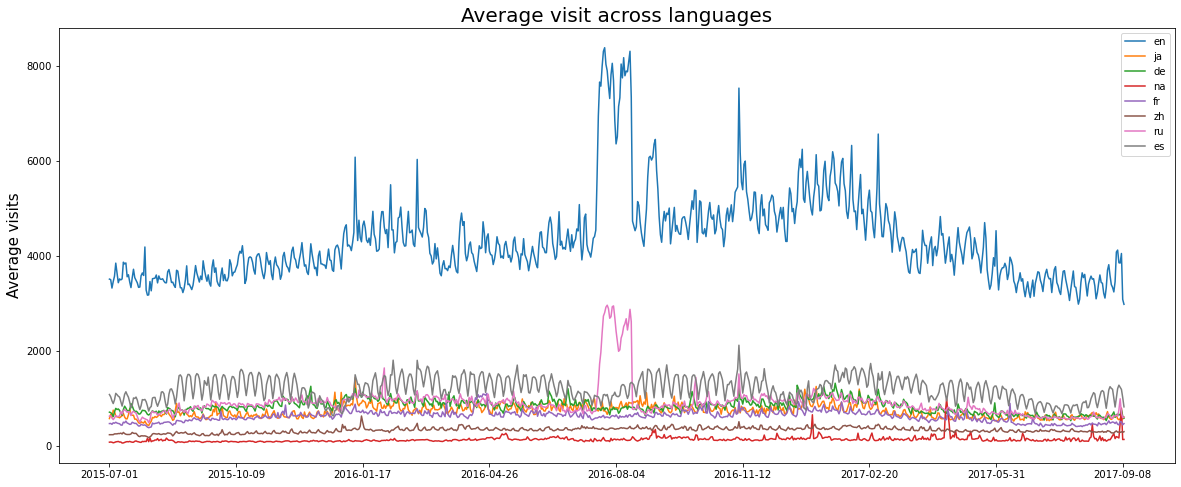

In [ ]:
lang_sets = {}
lang_sets['en'] = df[df2.language=='en'].iloc[:,:-1]
lang_sets['ja'] = df[df2.language=='ja'].iloc[:,:-1]
lang_sets['de'] = df[df2.language=='de'].iloc[:,:-1]
lang_sets['na'] = df[df2.language=='na'].iloc[:,:-1]
lang_sets['fr'] = df[df2.language=='fr'].iloc[:,:-1]
lang_sets['zh'] = df[df2.language=='zh'].iloc[:,:-1]
lang_sets['ru'] = df[df2.language=='ru'].iloc[:,:-1]
lang_sets['es'] = df[df2.language=='es'].iloc[:,:-1]

sums = {}
for key in lang_sets:    
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0] # average click per day
    
for key in lang_sets:
    sums[key].plot(figsize=(20, 8))
plt.legend(list(lang_sets.keys()))
plt.ylabel("Average visits", fontsize=15)
plt.title("Average visit across languages", fontsize=20)

<AxesSubplot:>

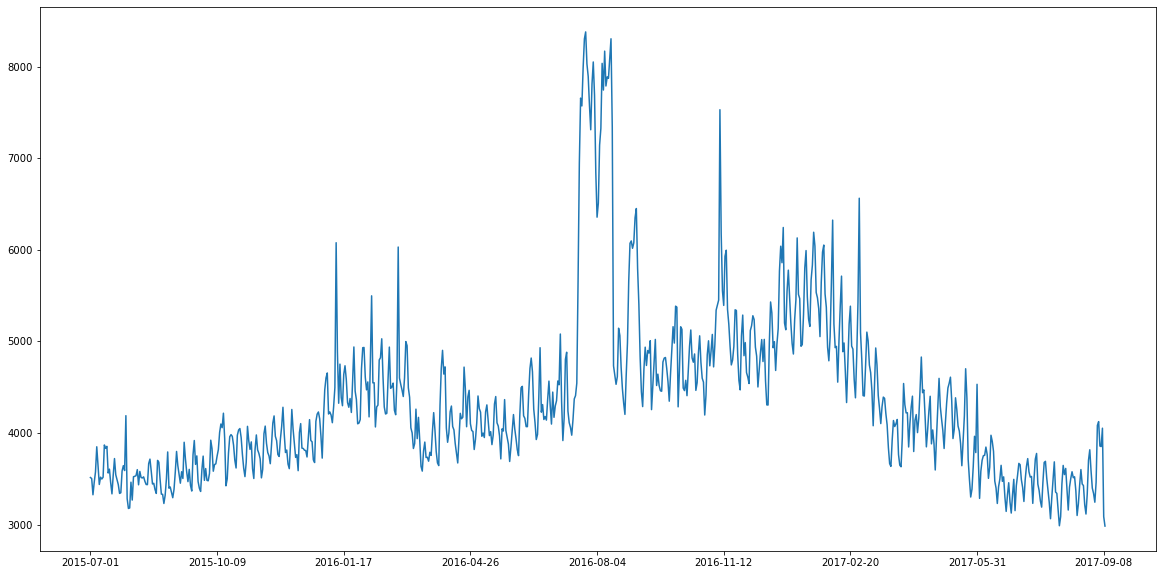

In [ ]:
sums["en"].plot(figsize=(20, 10))

### Select English pages
Since English pages are more explainable and have larger instances, we selected pages with “en” language code, which denotes English pages.

### Delete pages with Spider access
Considering the objective of this project, pages with only Spider access are not meeting the expectation, since visits to these pages can not represent views on them. Thus, the pages with only Spider access should be excluded from our training dataset.


In [ ]:
df_de = df[(df2.language=='en')&(df2.agent=='all-agents')]
df2_de = df2[(df2.language=='en')&(df2.agent=='all-agents')]
df_de

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
8357,!vote_en.wikipedia.org_desktop_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,...,8.0,6.0,4.0,5.0,4.0,2.0,2.0,9.0,3.0,3.0
8358,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,608.0,551.0,582.0,631.0,617.0,684.0,649.0,640.0,498.0,546.0
8359,"""European_Society_for_Clinical_Investigation""_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
8360,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...",2403.0,20136.0,1850.0,1432.0,1351.0,1792.0,1710.0,2039.0,1957.0,...,1336.0,1106.0,1309.0,1334.0,1381.0,1370.0,2041.0,1381.0,1084.0,1157.0
8361,100_metres_en.wikipedia.org_desktop_all-agents,982.0,881.0,794.0,979.0,1191.0,1057.0,1184.0,860.0,1259.0,...,436.0,374.0,422.0,467.0,641.0,525.0,490.0,580.0,539.0,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113946,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,1.0,5.0,2.0,2.0,NaN,1.0,NaN,NaN,2.0,...,NaN,1.0,NaN,NaN,1.0,2.0,NaN,2.0,2.0,NaN
113947,Zillur_Rahman_John_en.wikipedia.org_all-access...,7.0,9.0,3.0,6.0,4.0,2.0,6.0,7.0,6.0,...,5.0,4.0,4.0,6.0,5.0,6.0,5.0,6.0,7.0,5.0
113948,Zitadelle_en.wikipedia.org_all-access_all-agents,10.0,6.0,4.0,8.0,13.0,5.0,9.0,5.0,4.0,...,7.0,8.0,4.0,2.0,7.0,6.0,4.0,12.0,3.0,5.0
113949,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...",NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,12.0,10.0,8.0,6.0,4.0,4.0,5.0,6.0,6.0,9.0


In [ ]:
df_de.shape

(19177, 804)

### Data examples

Text(0.5, 1.0, 'Donald_Trump_en.wikipedia.org_all-access_all-agents')

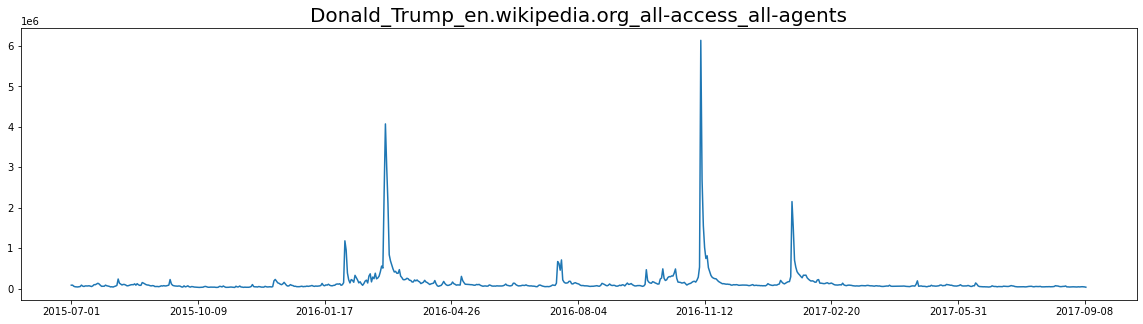

In [ ]:
df_de.loc[df['Page'] == 'Donald_Trump_en.wikipedia.org_all-access_all-agents'].iloc[0, 1:].plot(figsize=(20, 5))
plt.title("Donald_Trump_en.wikipedia.org_all-access_all-agents",fontsize=20)

Text(0.5, 1.0, '2016_shooting_of_Dallas_police_officers_en.wikipedia.org_desktop_all-agents')

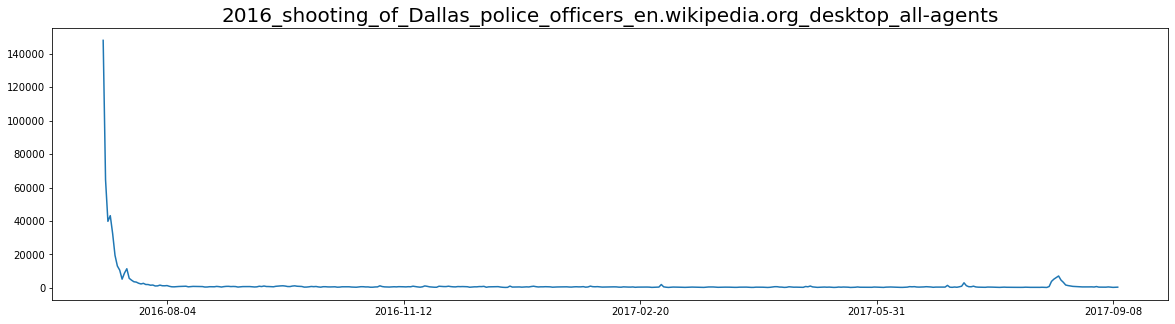

In [ ]:
df_de.loc[df['Page'] == '2016_shooting_of_Dallas_police_officers_en.wikipedia.org_desktop_all-agents'].iloc[0, 1:].plot(figsize=(20, 5))
plt.title("2016_shooting_of_Dallas_police_officers_en.wikipedia.org_desktop_all-agents",fontsize=20)

Text(0.5, 1.0, 'Halloween_en.wikipedia.org_all-access_all-agents')

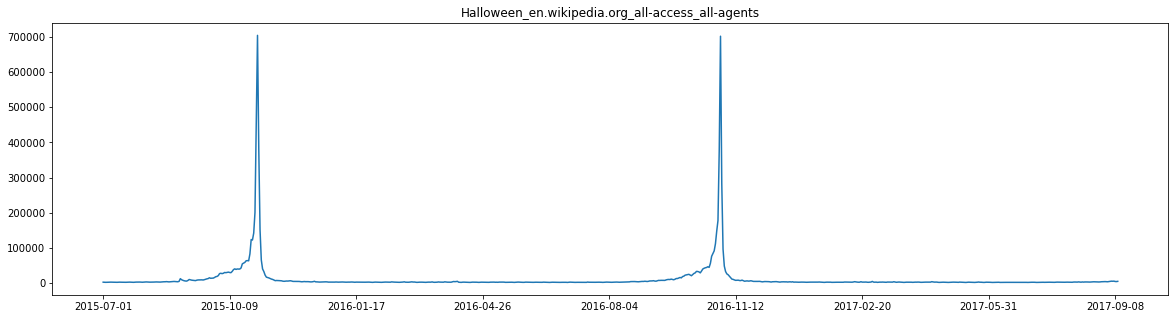

In [ ]:
df_de.loc[df['Page'] == 'Halloween_en.wikipedia.org_all-access_all-agents'].iloc[0, 1:].plot(figsize=(20, 5))
plt.title("Halloween_en.wikipedia.org_all-access_all-agents")

Text(0.5, 1.0, 'OSI_model_en.wikipedia.org_desktop_all-agents')

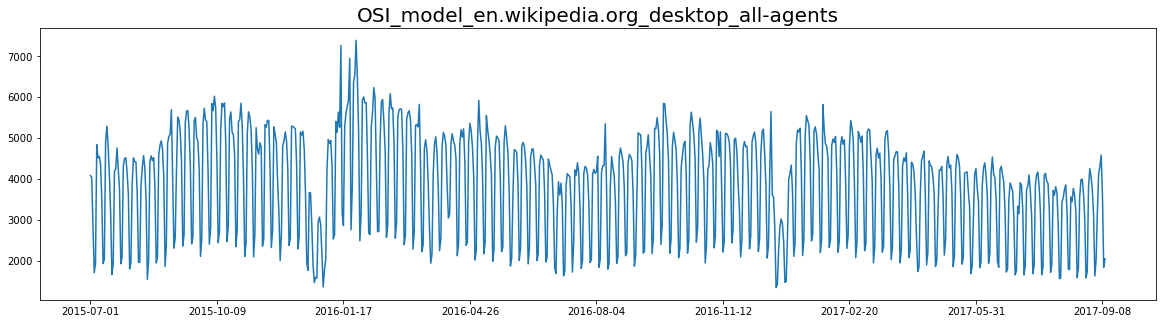

In [ ]:
df_de.loc[df['Page'] == 'OSI_model_en.wikipedia.org_desktop_all-agents'].iloc[0, 1:].plot(figsize=(20, 5))
plt.title("OSI_model_en.wikipedia.org_desktop_all-agents",fontsize=20)

Text(0.5, 1.0, 'Combinatorial_optimization_en.wikipedia.org_all-access_all-agents')

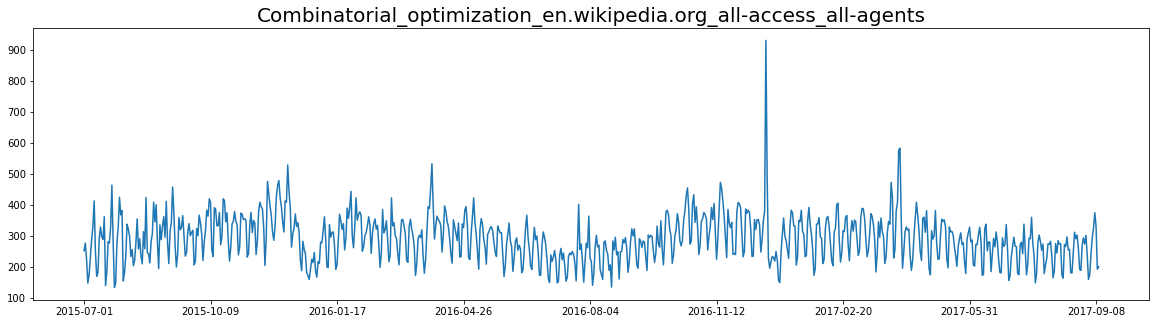

In [ ]:
df_de.loc[df['Page'] == 'Combinatorial_optimization_en.wikipedia.org_all-access_all-agents'].iloc[0, 1:].plot(figsize=(20, 5))
plt.title("Combinatorial_optimization_en.wikipedia.org_all-access_all-agents",fontsize=20)

### Delete pages with extreme peaks
As in the data summary part, some individual pages have gigantic spikes because of events or emergencies, instead of regular trends. To better understand and capture the trends, we delete pages with extreme peaks by calculating the percentage changes of the historical visits. We only keep pages with relatively steady trends that do not have a percentage change greater than 300% in a day and a percentage change greater than 500% in a week.

In [ ]:
high_volatility_row = []
for i in range(df_de.shape[0]):
    highest_pct_day_change = pd.Series(df_de.iloc[i][1:]).pct_change().sort_values(ascending=False, key=abs)[0]
    highest_pct_week_change = pd.Series(df_de.iloc[i][1:]).pct_change(periods=7).sort_values(ascending=False, key=abs)[0]
    if ((highest_pct_day_change > 3) | (highest_pct_week_change > 5)):
        high_volatility_row.append(i)
df_de = df_de.drop(df_de.index[high_volatility_row])

In [ ]:
df_de

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
8375,2000_Summer_Olympics_en.wikipedia.org_desktop_...,691.0,622.0,490.0,514.0,564.0,837.0,737.0,727.0,710.0,...,487.0,451.0,568.0,555.0,611.0,586.0,943.0,491.0,389.0,444.0
8384,2014_FIFA_World_Cup_en.wikipedia.org_desktop_a...,7798.0,6562.0,4748.0,5789.0,8394.0,12192.0,7554.0,9155.0,6736.0,...,3710.0,3356.0,3524.0,4291.0,5842.0,5774.0,3520.0,2667.0,1942.0,1974.0
8387,2015_in_film_en.wikipedia.org_desktop_all-agents,28511.0,27969.0,27097.0,25657.0,28155.0,34236.0,29132.0,27034.0,27542.0,...,841.0,941.0,948.0,977.0,987.0,786.0,835.0,1154.0,908.0,823.0
8390,2016_Democratic_National_Convention_en.wikiped...,508.0,562.0,464.0,361.0,332.0,483.0,553.0,622.0,727.0,...,206.0,190.0,185.0,163.0,222.0,236.0,231.0,232.0,180.0,179.0
8398,2016_IIHF_World_Championship_en.wikipedia.org_...,121.0,80.0,77.0,71.0,58.0,128.0,113.0,108.0,106.0,...,38.0,45.0,50.0,57.0,74.0,53.0,60.0,43.0,55.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113881,XCOPY_en.wikipedia.org_all-access_all-agents,179.0,190.0,147.0,67.0,87.0,188.0,165.0,171.0,180.0,...,106.0,53.0,43.0,92.0,103.0,134.0,114.0,125.0,58.0,47.0
113913,You_Boyz_Make_Big_Noize_en.wikipedia.org_all-a...,177.0,61.0,21.0,35.0,24.0,43.0,31.0,26.0,46.0,...,45.0,48.0,61.0,33.0,33.0,37.0,33.0,41.0,31.0,28.0
113917,Youdu_en.wikipedia.org_all-access_all-agents,27.0,31.0,36.0,30.0,36.0,42.0,34.0,26.0,39.0,...,30.0,35.0,31.0,30.0,29.0,37.0,29.0,34.0,22.0,34.0
113919,Yousef_Erakat_en.wikipedia.org_all-access_all-...,1061.0,1024.0,1061.0,956.0,1024.0,1260.0,1106.0,1205.0,959.0,...,497.0,578.0,562.0,686.0,559.0,477.0,540.0,566.0,700.0,820.0


In [ ]:
df_sorted = df_de.loc[df_de.iloc[:,-365:].sum(axis=1).sort_values(ascending=False).index[:]]
df_sorted.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
38573,Main_Page_en.wikipedia.org_all-access_all-agents,20381245.0,20752194.0,19573967.0,20439645.0,20772109.0,22544669.0,21210887.0,19107911.0,19993848.0,...,13722563.0,15788880.0,18561510.0,19062496.0,18395168.0,17499187.0,18273046.0,14116665.0,12696261.0,15731110.0
9774,Main_Page_en.wikipedia.org_desktop_all-agents,11952559.0,12344021.0,11195848.0,11982470.0,12379684.0,14164829.0,12917172.0,11089923.0,12067334.0,...,11827490.0,13883525.0,16411261.0,16906601.0,16235049.0,15458480.0,16256524.0,12236818.0,10723874.0,13755046.0
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,8039732.0,8018607.0,7980511.0,8024814.0,7929962.0,7959839.0,7892357.0,7607871.0,7515302.0,...,1809307.0,1819966.0,2069876.0,2063032.0,2076405.0,1912028.0,1937004.0,1802121.0,1884689.0,1884638.0
74690,Special:Search_en.wikipedia.org_mobile-web_all...,406584.0,407692.0,387745.0,393397.0,430026.0,409166.0,408965.0,399192.0,407794.0,...,670184.0,706761.0,809895.0,884105.0,897158.0,892978.0,886247.0,746315.0,749131.0,859703.0
40691,Special:Watchlist_en.wikipedia.org_all-access_...,78282.0,74246.0,69830.0,65128.0,68272.0,75424.0,78434.0,74917.0,75100.0,...,66830.0,59920.0,62005.0,65535.0,70206.0,67453.0,68033.0,65230.0,58185.0,59187.0
40895,XXX_en.wikipedia.org_all-access_all-agents,16482.0,15777.0,16665.0,17435.0,17538.0,16999.0,16154.0,16127.0,16247.0,...,19440.0,20150.0,21584.0,21475.0,20492.0,20428.0,19953.0,20784.0,20782.0,20776.0
11907,Special:Watchlist_en.wikipedia.org_desktop_all...,77138.0,73280.0,68957.0,64220.0,67192.0,74385.0,77410.0,73934.0,74215.0,...,64116.0,57360.0,59075.0,62644.0,67781.0,65056.0,65545.0,62974.0,55883.0,56828.0
76362,XXX_en.wikipedia.org_mobile-web_all-agents,14073.0,13497.0,14473.0,14991.0,15027.0,14464.0,13761.0,13860.0,13857.0,...,17653.0,18188.0,19511.0,19385.0,18312.0,18349.0,17917.0,18793.0,18793.0,19059.0
39173,Special:CiteThisPage_en.wikipedia.org_all-acce...,48921.0,30174.0,26195.0,32507.0,31730.0,37392.0,50938.0,64015.0,38316.0,...,50917.0,49544.0,30226.0,36273.0,87869.0,234445.0,111302.0,45729.0,49871.0,48980.0
10400,Special:CiteThisPage_en.wikipedia.org_desktop_...,48817.0,30100.0,26155.0,32471.0,31401.0,37216.0,50432.0,63258.0,38053.0,...,50783.0,49377.0,30106.0,36136.0,87614.0,234238.0,110995.0,45611.0,49683.0,48780.0


In [ ]:
df_sorted.shape

(1528, 804)

### Delete outliers
After steps above, the dataset contains 1528 pages. After sorted by visits in recent 365 days from high to low, the “Main_Page” and “Special:Search” pages have extreme high visits compared to other pages. We count these pages as outliers and exclude them from the training dataset.

Text(0.5, 1.0, 'Top 10 pages with highest visits: before deleting outliers')

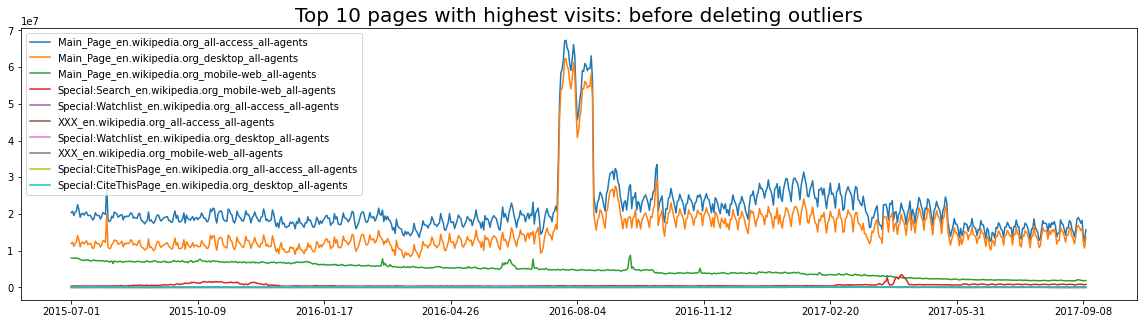

In [ ]:
high_view_sets = {}
for i in range(0,10):
    high_view_sets[df_sorted.iloc[i][0]] = df_sorted.iloc[i][1:]
    
for key in high_view_sets:
    high_view_sets[key].plot(figsize=(20, 5))
plt.legend(list(high_view_sets.keys()))
plt.title("Top 10 pages with highest visits: before deleting outliers",fontsize=20)

### Select the top 1200 pages with the highest average views
As mentioned in the data summary, the data source for this dataset does not distinguish between traffic values of zero and missing values. Pages with few visits are not beneficial to our training process, since their historical visits may contain multiple zeros. To address this problem, we select the top 1200 pages with the highest average views to reduce the confusion between traffic values of zero and missing values.

Text(0.5, 1.0, 'Top 10 pages with highest visits: after deleting outliers')

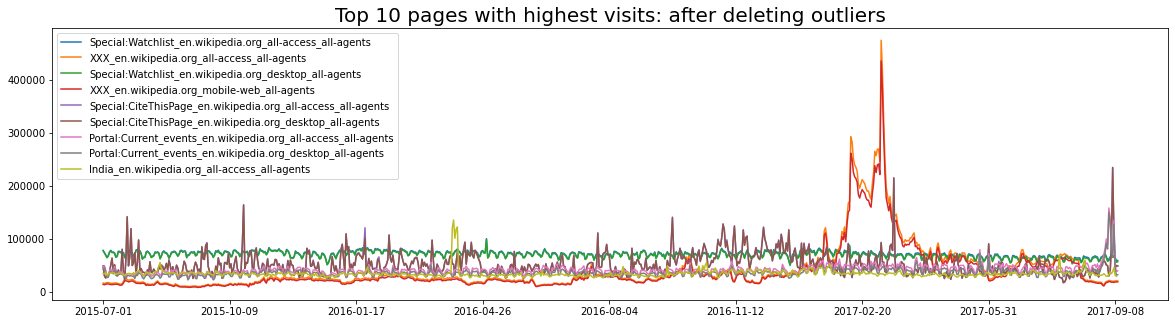

In [ ]:
high_view_sets = {}
for i in range(4,13):
    high_view_sets[df_sorted.iloc[i][0]] = df_sorted.iloc[i][1:]
    
for key in high_view_sets:
    high_view_sets[key].plot(figsize=(20, 5))
plt.legend(list(high_view_sets.keys()))
plt.title("Top 10 pages with highest visits: after deleting outliers",fontsize=20)

In [ ]:
df_sorted = df_sorted.drop(df_sorted.iloc[0:4].index)[0:1200]
df_sorted

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
40691,Special:Watchlist_en.wikipedia.org_all-access_...,78282.0,74246.0,69830.0,65128.0,68272.0,75424.0,78434.0,74917.0,75100.0,...,66830.0,59920.0,62005.0,65535.0,70206.0,67453.0,68033.0,65230.0,58185.0,59187.0
40895,XXX_en.wikipedia.org_all-access_all-agents,16482.0,15777.0,16665.0,17435.0,17538.0,16999.0,16154.0,16127.0,16247.0,...,19440.0,20150.0,21584.0,21475.0,20492.0,20428.0,19953.0,20784.0,20782.0,20776.0
11907,Special:Watchlist_en.wikipedia.org_desktop_all...,77138.0,73280.0,68957.0,64220.0,67192.0,74385.0,77410.0,73934.0,74215.0,...,64116.0,57360.0,59075.0,62644.0,67781.0,65056.0,65545.0,62974.0,55883.0,56828.0
76362,XXX_en.wikipedia.org_mobile-web_all-agents,14073.0,13497.0,14473.0,14991.0,15027.0,14464.0,13761.0,13860.0,13857.0,...,17653.0,18188.0,19511.0,19385.0,18312.0,18349.0,17917.0,18793.0,18793.0,19059.0
39173,Special:CiteThisPage_en.wikipedia.org_all-acce...,48921.0,30174.0,26195.0,32507.0,31730.0,37392.0,50938.0,64015.0,38316.0,...,50917.0,49544.0,30226.0,36273.0,87869.0,234445.0,111302.0,45729.0,49871.0,48980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74471,Ratchet_&_Clank_en.wikipedia.org_mobile-web_al...,743.0,795.0,809.0,914.0,837.0,834.0,890.0,812.0,808.0,...,531.0,645.0,686.0,725.0,537.0,533.0,500.0,488.0,622.0,702.0
76708,List_of_the_most_subscribed_users_on_YouTube_e...,1976.0,1996.0,2054.0,2115.0,2447.0,2542.0,2974.0,3451.0,3406.0,...,83.0,71.0,94.0,104.0,75.0,70.0,61.0,50.0,87.0,74.0
75140,Yip_Man_en.wikipedia.org_mobile-web_all-agents,1039.0,1102.0,1488.0,1399.0,1550.0,1917.0,1765.0,1494.0,1712.0,...,279.0,349.0,429.0,308.0,491.0,238.0,236.0,264.0,257.0,384.0
11201,Deus_Ex:_Mankind_Divided_en.wikipedia.org_desk...,906.0,849.0,884.0,832.0,880.0,957.0,861.0,880.0,892.0,...,583.0,483.0,553.0,577.0,492.0,427.0,419.0,434.0,389.0,544.0


### Select the top 1000 pages with the lowest standard deviation
To further decrease control abnormal fluctuations and the training dataset size, we sort the datasets by the standard deviation in historical views from lowest to highest. We select the top 1000 pages with the lowest standard deviation. The training dataset is as blow.

In [ ]:
df_sorted_std = df_sorted.loc[df_sorted.std(axis=1).sort_values(ascending=True).index[:]][:1000]
df_sorted_std

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
109663,Agatha_Christie's_Poirot_en.wikipedia.org_all-...,817.0,757.0,888.0,906.0,1125.0,913.0,1102.0,977.0,852.0,...,867.0,952.0,1223.0,1057.0,992.0,1018.0,1199.0,1035.0,1002.0,1184.0
109805,Anglicanism_en.wikipedia.org_all-access_all-ag...,1566.0,1899.0,1431.0,1440.0,1865.0,1654.0,1812.0,1447.0,1480.0,...,1715.0,1622.0,1961.0,2212.0,2283.0,2313.0,3084.0,1793.0,1454.0,1847.0
73420,English_language_en.wikipedia.org_mobile-web_a...,4365.0,4360.0,4204.0,4299.0,4637.0,4618.0,4418.0,4346.0,4399.0,...,4049.0,4283.0,4654.0,4845.0,4930.0,4775.0,4781.0,4389.0,4481.0,4805.0
73081,Borderline_personality_disorder_en.wikipedia.o...,5628.0,4853.0,4840.0,4909.0,4970.0,5071.0,5148.0,5215.0,4898.0,...,4350.0,4341.0,4262.0,4474.0,4430.0,4353.0,4383.0,4134.0,4038.0,4312.0
76272,Tramadol_en.wikipedia.org_mobile-web_all-agents,6451.0,6583.0,6267.0,5995.0,5917.0,6385.0,6747.0,6734.0,6837.0,...,5387.0,5101.0,4966.0,4399.0,4223.0,4253.0,5315.0,5194.0,4802.0,4459.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41943,Nationwide_opinion_polling_for_the_United_Stat...,2055.0,1968.0,1729.0,1525.0,1539.0,1695.0,1888.0,1730.0,2004.0,...,191.0,118.0,168.0,186.0,148.0,97.0,95.0,90.0,82.0,77.0
41590,DC_Extended_Universe_en.wikipedia.org_all-acce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6382.0,7023.0,7696.0,7638.0,7464.0,6707.0,7806.0,6617.0,6866.0,NaN
9674,List_of_South_Park_episodes_en.wikipedia.org_d...,4052.0,3863.0,3281.0,3655.0,4074.0,4473.0,5689.0,6790.0,6173.0,...,2731.0,3009.0,3543.0,3958.0,3556.0,3829.0,4137.0,4057.0,3678.0,4411.0
40076,Glory_(Britney_Spears_album)_en.wikipedia.org_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,717.0,830.0,811.0,780.0,716.0,680.0,677.0,619.0,663.0,776.0


In [ ]:
df_sorted_std.iloc[312, 0]

'Mary_I_of_England_en.wikipedia.org_mobile-web_all-agents'

<AxesSubplot:>

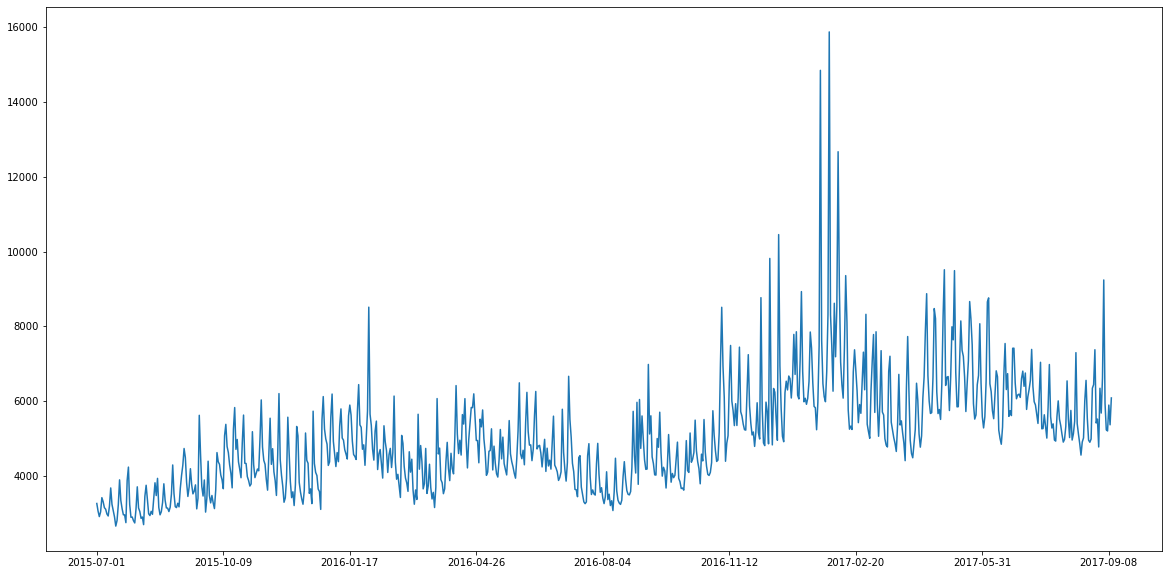

In [ ]:
df_sorted_std.iloc[312, 1:].plot(figsize=(20, 10))

<AxesSubplot:>

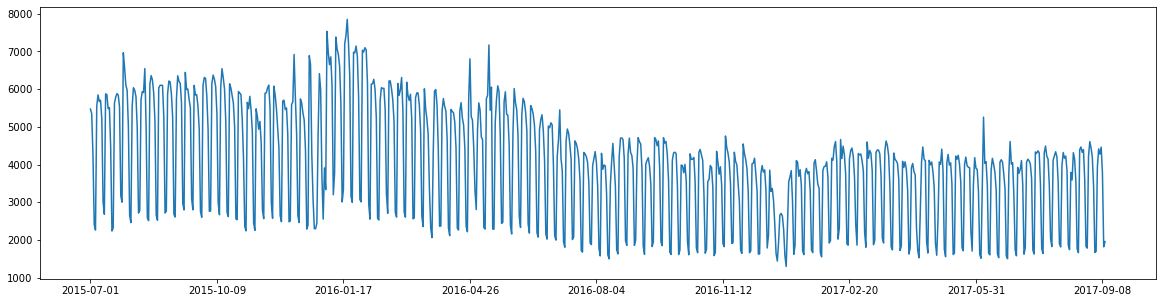

In [ ]:
df_sorted_std.loc[df['Page'] == 'List_of_country_calling_codes_en.wikipedia.org_desktop_all-agents'].iloc[0, 1:].plot(figsize=(20, 5))